# SVM classifier for baseline results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk


%matplotlib inline

## Setup dataframe with clip labeling by gender & emotion

In [4]:
audio_data = np.load("audio_data.npy")
labels = np.load("wav_labels.npy")

# labels: modality-vocal channel-emotion-emotional intensity-statement-repetition-actor
# emotions: 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# odd number actors = male, even = female

# 1440 files: 24 speakers, 60 recordings per speaker
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    
    if (labels[i][6]%2 == 0):
        label = "Female"
    else:
        label = "Male"
        
    if (labels[i][2] == 1):
        emot = "neutral"
    elif (labels[i][2] == 2):
        emot = "calm"
    elif (labels[i][2] == 3):
        emot = "happy"
    elif (labels[i][2] == 4):
        emot = "sad"
    elif (labels[i][2] == 5):
        emot = "angry"
    elif (labels[i][2] == 6):
        emot = "fearful"
    elif (labels[i][2] == 7):
        emot = "disgust"
    elif (labels[i][2] == 8):
        emot = "surprised"
    
    features.append([audio_data[i], label, emot])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "gender", "emotion"])

feature_df.head()

,mfcc,gender,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",Male,neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male,neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male,neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",Male,neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",Male,calm


## Breakdown Dataframe and run through SVM

In [6]:
X = np.array(feature_df.mfcc.tolist())

Y = np.array(feature_df.gender.tolist())

Y1 = np.array(feature_df.emotion.tolist())

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y1, test_size=0.25, random_state=0)

# Standard SVM
svm_gender = sk.svm.SVC()

svm_gender.fit(x_train, y_train)

predictions_gen = svm_gender.predict(x_test)

svm_emotion = sk.svm.SVC()

svm_emotion.fit(X_train, Y_train)

predictions_emot = svm_emotion.predict(X_test)

## Display Results: Confusion Matrices

Gender Classification
   Male  Female
0   171      12
1     9     168


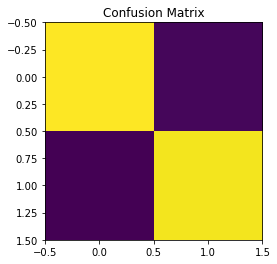

Emotion Classification
   neutral  calm  happy  sad  angry  fearful  disgust  surprised
0       22     1      8    1     10        0        0          3
1        0    47      0    0      2        0        5          0
2        2    10     22    0      4        0        4          4
3       11     1      5    9      6        0        4         11
4        5     2      4    3     11        0        6         11
5        0    16      1    0      1        0       10          0
6        1    17      5    1      7        0       11          3
7        2     2      1    1     12        0        8         27


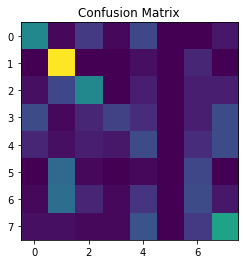

In [7]:
cm_gen = sk.metrics.confusion_matrix(y_test, predictions_gen)
cm_emot = sk.metrics.confusion_matrix(Y_test, predictions_emot)

print("Gender Classification")
df = pd.DataFrame(cm_gen, columns=[Y[0], Y[60]])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm_gen)
plt.title("Confusion Matrix")
plt.show()

print("Emotion Classification")
df = pd.DataFrame(cm_emot, columns=[Y1[0], Y1[4], Y1[12], Y1[20], Y1[28], Y1[36], Y1[44], Y1[52] ])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm_emot)
plt.title("Confusion Matrix")
plt.show()

## Precision Results

In [13]:
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(confmatrix)
    fp = np.sum(confmatrix, axis=0) - tp  
    precision = np.nanmean(tp/(tp+fp)) # nan issue if 0s in diag
    return precision

prec_gen = precision(cm_gen)

prec_emot = precision(cm_emot)

print("Classification by Gender Precision: " + str(prec_gen))


print("Classification by Emotion Precision: " + str(prec_emot))

Classification by Gender Precision: 0.9416666666666667
Classification by Emotion Precision: 0.4248304378567642


<ipython-input-13-def7d87bbd20>:5: RuntimeWarning: invalid value encountered in true_divide
  precision = np.nanmean(tp/(tp+fp))
